### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import scipy.stats as stats

from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix,accuracy_score, classification_report,f1_score,cohen_kappa_score

### Importing Data & Pre-processing

In [2]:
df = pd.read_csv('sample_data_intw.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [4]:
df.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [5]:
# Getting the count of unique values in each column
unique_value_counts = df.nunique().to_frame(name='Unique Value Count')
unique_value_counts

,Unique Value Count
Unnamed: 0,209593
label,2
msisdn,186243
aon,4507
daily_decr30,147025
daily_decr90,158669
rental30,132148
rental90,141033
last_rech_date_ma,1186
last_rech_date_da,1174


 Columns that have only one unique value (low variance) across all rows are not useful for analysis as they do not
 contribute any information that can differentiate between rows.
 For example, pcircle has only 1 unique value, so it likely won't be useful in any analysis.


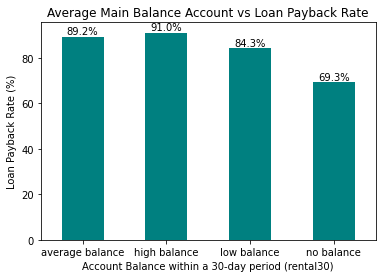

In [6]:
import matplotlib.pyplot as plt

# thresholds based on percentiles
low_balance_threshold = df['rental30'].quantile(0.25)
high_balance_threshold = df['rental30'].quantile(0.75)

# categorize balance based on thresholds
def categorize_balance(value):
    if value <= 0:
        return 'no balance'
    elif value <= low_balance_threshold:
        return 'low balance'
    elif value <= high_balance_threshold:
        return 'average balance'
    else:
        return 'high balance'

df['balance_group'] = df['rental30'].apply(categorize_balance)

#calculate the percentage of labels for each balance group
percentage = pd.crosstab(df['label'], df['balance_group'], normalize='columns').apply(lambda x: x * 100)
percentage = percentage.transpose()

plot_balance = percentage[1].plot(kind='bar', color='teal', figsize=(6, 4))

plt.title('Average Main Balance Account vs Loan Payback Rate')
plt.ylabel('Loan Payback Rate (%)')
plt.xlabel('Account Balance within a 30-day period (rental30)')
plt.xticks(rotation='horizontal')

for rec, label in zip(plot_balance.patches, percentage[1].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width() / 2,
                      rec.get_height() + 1,
                      label + '%',
                      ha='center',
                      color='black')

plt.show()

High balance leads to higher payback rate. Accounts with an average balance have an 89.2% payback rate, while those with a low balance have a significantly lower payback rate at 84.3%. This indicates that as the account balance decreases, so does the likelihood of loan repayment.
No balance has the lowest payback rate. The graph illustrates a clear trend that the higher the account balance, the higher the loan payback rate

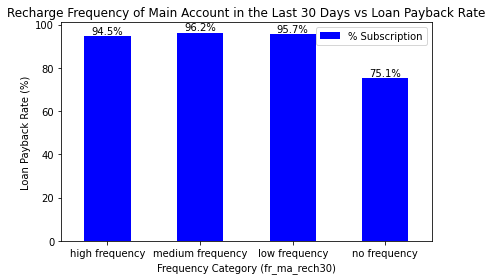

In [7]:


import matplotlib.pyplot as plt
import pandas as pd

# Define the frequency groups based on the 'fr_ma_rech30' column
df['frequency_group'] = pd.cut(
    df['fr_ma_rech30'],
    bins=[-1, 0, 1, 2, float('inf')],
    labels=['no frequency', 'low frequency', 'medium frequency', 'high frequency']
)

category_order = ['high frequency', 'medium frequency', 'low frequency', 'no frequency']
frequency_counts = df['frequency_group'].value_counts().reindex(category_order)
subscription_counts = df[df['label'] == 1]['frequency_group'].value_counts().reindex(category_order)
percent_subscriptions = (subscription_counts / frequency_counts) * 100

fre = pd.DataFrame({
    'Frequency Group': category_order,
    'Frequency Count': frequency_counts,
    'Subscription Count': subscription_counts,
    '% Subscription': percent_subscriptions
}).reset_index(drop=True)

ax = fre.plot(
    x='Frequency Group',
    y='% Subscription',
    kind='bar',
    color='blue',
    figsize=(6, 4)
)

plt.title('Recharge Frequency of Main Account in the Last 30 Days vs Loan Payback Rate')
plt.ylabel('Loan Payback Rate (%)')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation='horizontal')

for rec, label in zip(ax.patches, fre['% Subscription'].round(1).astype(str)):
    ax.text(
        rec.get_x() + rec.get_width() / 2,
        rec.get_height() + 1,
        label + '%',
        ha='center',
        color='black'
    )
plt.tight_layout()
plt.show()

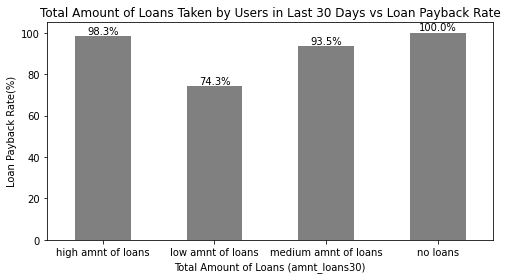

In [8]:
# thresholds based on percentiles
low_loanamnt_threshold = df['amnt_loans30'].quantile(0.25)
high_loanamnt_threshold = df['amnt_loans30'].quantile(0.75)

# categorize loan amounts based on thresholds
def categorize_loanamnt(value):
    if value <= 0:
        return 'no loans'
    elif value <= low_loanamnt_threshold:
        return 'low amnt of loans'
    elif value <= high_loanamnt_threshold:
        return 'medium amnt of loans'
    else:
        return 'high amnt of loans'

df['loanamnt_frequency_group'] = df['amnt_loans30'].apply(categorize_loanamnt)

# Calculate the percentage of labels for each loan amount group
percentage = pd.crosstab(df['label'], df['loanamnt_frequency_group'], normalize='columns').apply(lambda x: x * 100)
percentage = percentage.transpose()

plot_loanamnt = percentage[1].plot(kind='bar', color='gray', figsize=(8, 4))

plt.title('Total Amount of Loans Taken by Users in Last 30 Days vs Loan Payback Rate')
plt.ylabel('Loan Payback Rate(%)')
plt.xlabel('Total Amount of Loans (amnt_loans30)')
plt.xticks(rotation='horizontal')

for rec, label in zip(plot_loanamnt.patches, percentage[1].round(1).astype(str)):
    plot_loanamnt.text(
        rec.get_x() + rec.get_width() / 2,
        rec.get_height() + 1,
        label + '%',
        ha='center',
        color='black'
    )

plt.show()


In [9]:
df.shape


(209593, 40)

In [10]:
# Separate categorical columns, we are going to drop non-numeric columns, and the columns we added earlier for plotting.
non_num = [col for col in df.columns if df[col].dtype == "object"]

print(non_num)

['msisdn', 'pcircle', 'pdate', 'balance_group', 'loanamnt_frequency_group']


In [11]:
# dropping the column ['balance_group', 'frequency_group',	'loanamnt_frequency_group'that we added above and
# the features that we can ignore, 'pcircle', 'pdate', 'msisdn']
df = df.drop(columns=['balance_group', 'frequency_group',	'loanamnt_frequency_group', 'pcircle', 'pdate', 'msisdn'])
df.head(3)

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0
1,2,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,...,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0
2,3,1,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0


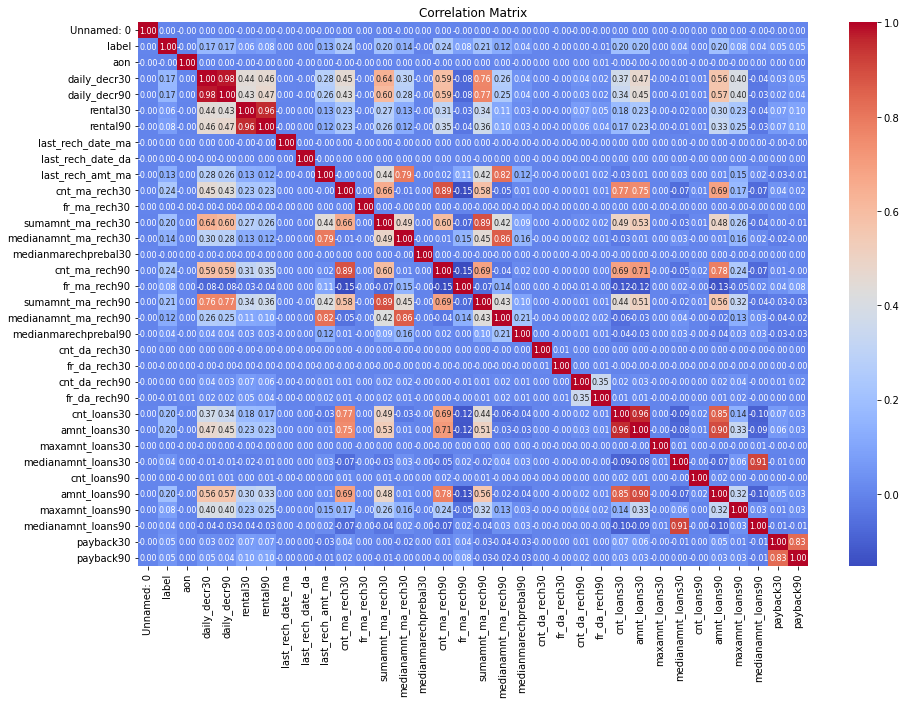

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix, considering only numeric columns
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 10)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

In [13]:
example = df.copy()
example

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,209590,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,209591,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,209592,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [14]:
# Data Standardization and Outlier Replacement
from scipy.stats import zscore
from scipy.stats import zscore
import re  # Import the regular expressions module

# Select columns that end with a number (30 or 90, etc.), excluding non-relevant columns like 'msisdn', 'pcircle', 'pdate'
pattern = re.compile(r'.*\d+$')
columns = [col for col in df.columns if pattern.match(col)]

# Standardize the columns, handle outliers, and apply cube root transformation
for column in columns:
    # The z-score normalization is applied to standardize the data, which centers the data around the mean
    # and scales it according to the standard deviation.
    df[column] = zscore(df[column])

    # Replace values that are outliers with the median of the column
    outliers = (df[column] > 3) | (df[column] < -3)
    print(sum(outliers))
    print('/n')
    df.loc[outliers, column] = df[column].median()

    # Apply cube root transformation
    df[column] = np.cbrt(df[column])

0
/n
4168
/n
4263
/n
4471
/n
4605
/n
3766
/n
1047
/n
3617
/n
2973
/n
1047
/n
4047
/n
4707
/n
3916
/n
3020
/n
1185
/n
958
/n
1047
/n
1194
/n
733
/n
3973
/n
4311
/n
963
/n
7610
/n
1047
/n
4164
/n
2043
/n
6501
/n
3152
/n
3657
/n


In [15]:
sum(outliers)

3657

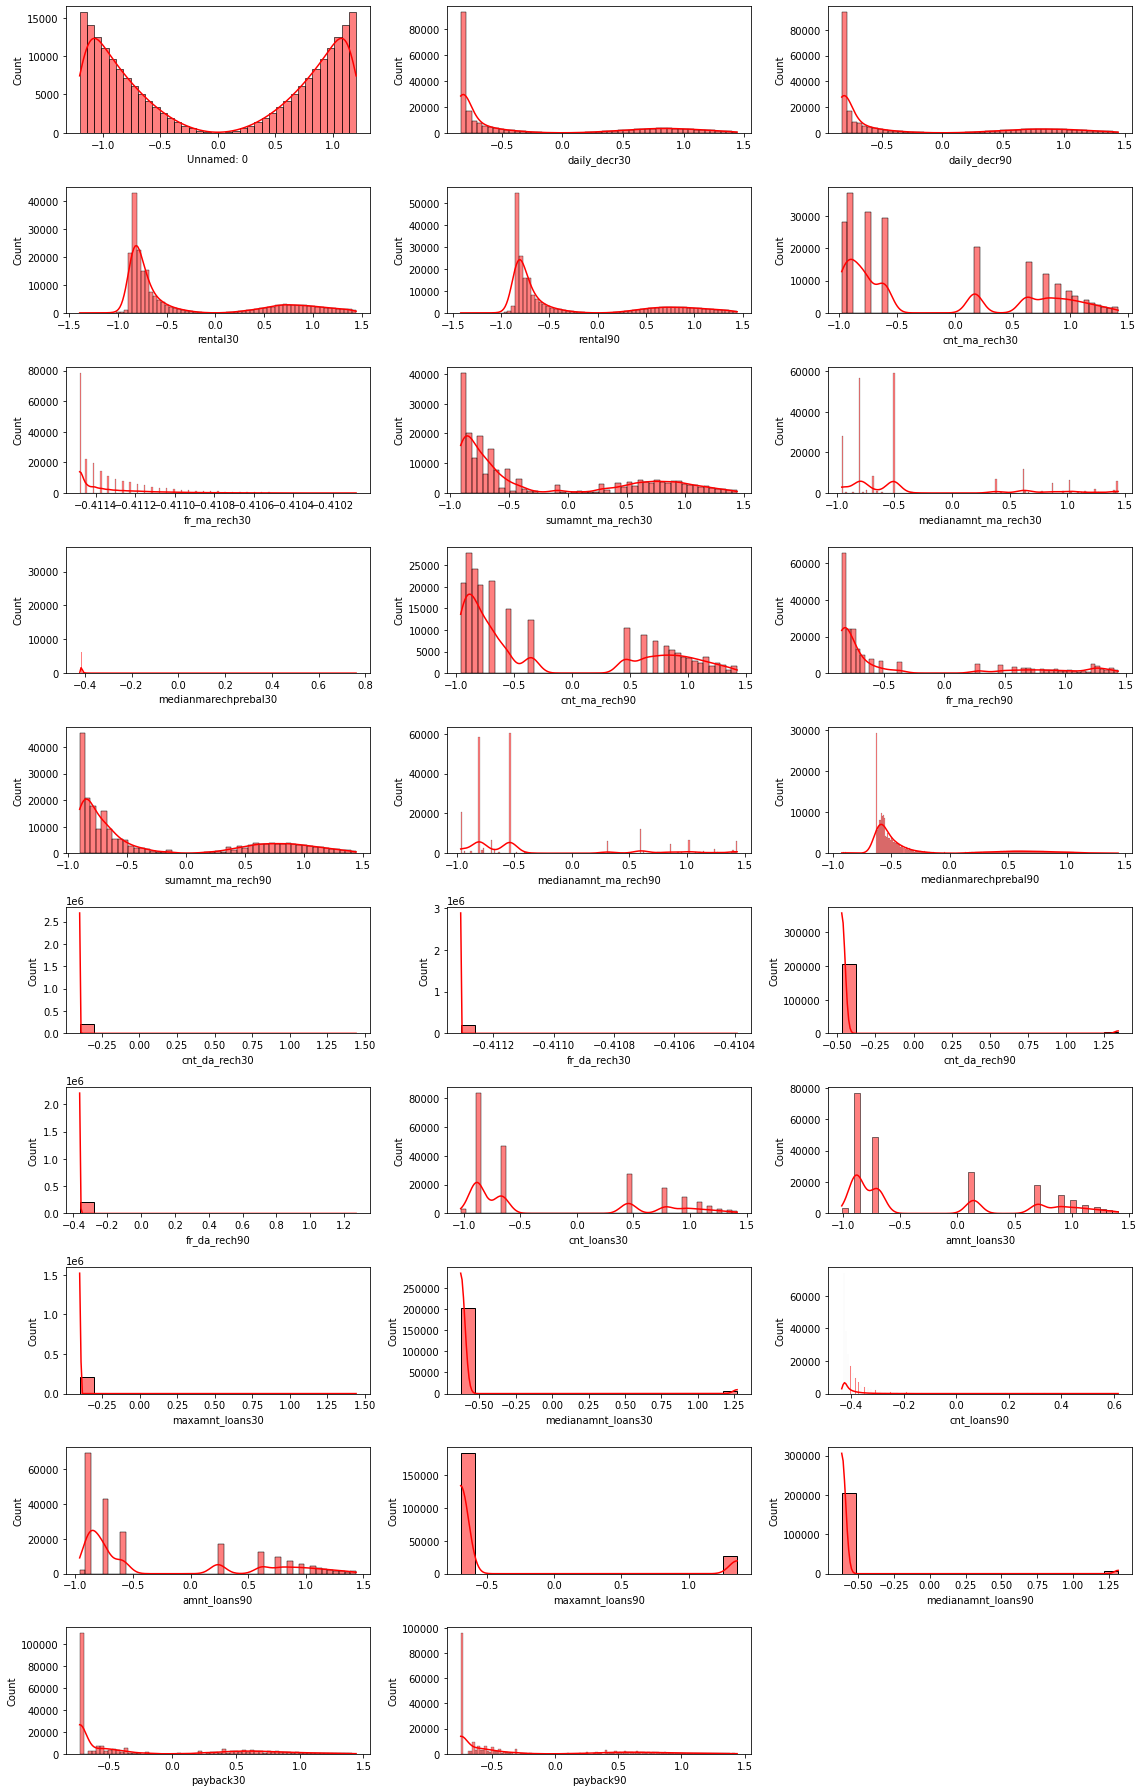

In [20]:
# The columns used for plotting are those in the DataFrame df that end with numbers

num_plots = len(columns)
# This ensures we have enough rows for all columns
num_rows = num_plots // 3 + (num_plots % 3 > 0)

fig, ax = plt.subplots(num_rows, 3, figsize=(16, num_rows * 2.5))
ax = ax.flatten()  # Flatten the axes array for easy iteration

# Iterate over the selected columns and create the distribution plots
for i, col in enumerate(columns):
    sns.histplot(df[col], ax=ax[i], color='red', kde=True)  

# If the number of plots is not a multiple of 3, we hide the last few subplots which are not needed
for j in range(num_plots, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [22]:
df

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-1.200935,0,272.0,-0.631886,-0.651355,-0.830994,-0.823561,2.0,0.0,1539,...,-0.667281,-0.699639,-0.398504,-0.628102,-0.418872,-0.760562,-0.693970,-0.612332,1.426813,1.337767
1,-1.200931,1,712.0,0.900837,0.820996,0.614277,0.330255,20.0,0.0,5787,...,-0.883050,-0.699639,-0.395515,-0.628102,-0.427158,-0.760562,1.360402,-0.612332,-0.727875,-0.748431
2,-1.200927,1,535.0,-0.755959,-0.754218,-0.746514,-0.764987,3.0,0.0,1539,...,-0.883050,-0.882673,-0.398504,-0.628102,-0.427158,-0.873562,-0.693970,-0.612332,-0.727875,-0.748431
3,-1.200924,1,241.0,-0.834590,-0.821858,-0.837741,-0.832051,41.0,0.0,947,...,-0.667281,-0.699639,-0.398504,-0.628102,-0.418872,-0.760562,-0.693970,-0.612332,-0.727875,-0.748431
4,-1.200920,1,947.0,-0.827820,-0.815968,-0.717832,-0.744840,4.0,0.0,2309,...,1.184100,1.114326,-0.398504,-0.628102,-0.371449,0.885112,-0.693970,-0.612332,-0.494459,-0.577773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1.200920,1,404.0,-0.827754,-0.815910,-0.719287,-0.745850,1.0,0.0,4048,...,-0.667281,-0.699639,-0.398504,-0.628102,-0.418872,-0.760562,-0.693970,-0.612332,-0.648057,-0.685569
209589,1.200924,1,1075.0,-0.833774,-0.821147,-0.607129,-0.672501,4.0,0.0,773,...,0.455249,0.140282,-0.398504,-0.628102,-0.410244,-0.597468,-0.693970,-0.612332,-0.648057,-0.685569
209590,1.200927,1,1013.0,0.888238,0.810890,0.902695,0.978717,3.0,0.0,1539,...,0.786124,1.114326,-0.395515,-0.628102,-0.381899,1.046706,1.360402,-0.612332,0.408583,-0.361792
209591,1.200931,1,1732.0,0.916865,0.840875,-0.808937,-0.756558,2.0,38.0,773,...,-0.667281,0.140282,-0.395515,-0.628102,-0.410244,0.237500,1.360402,-0.612332,-0.727875,0.843145


In [23]:
feature_columns = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
feature_data = df[feature_columns]

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

# Exclude non-numeric columns from scaling
numeric_df = feature_data.select_dtypes(include=[np.number])
scaler = MaxAbsScaler()
scaled_numeric_df = scaler.fit_transform(numeric_df)

# Apply PCA
pca = PCA(n_components=20)
principal_components = pca.fit_transform(numeric_df)
scaled_numeric_df

array([[ 2.72037880e-04, -4.38131664e-01, -4.51638957e-01, ...,
        -4.66482524e-01,  9.89379453e-01,  9.28013310e-01],
       [ 7.12099156e-04,  6.24614818e-01,  5.69265213e-01, ...,
        -4.66482524e-01, -5.04722414e-01, -5.19189072e-01],
       [ 5.35074506e-04, -5.24160395e-01, -5.22962229e-01, ...,
        -4.66482524e-01, -5.04722414e-01, -5.19189072e-01],
       ...,
       [ 1.01314107e-03,  6.15878845e-01,  5.62257692e-01, ...,
        -4.66482524e-01,  2.83319339e-01, -2.50976384e-01],
       [ 1.73224121e-03,  6.35728051e-01,  5.83048988e-01, ...,
        -4.66482524e-01, -5.04722414e-01,  5.84892289e-01],
       [ 1.58122018e-03, -3.18303174e-01, -3.61529641e-01, ...,
        -4.66482524e-01, -5.04722414e-01, -5.19189072e-01]])

In [25]:
len(scaled_numeric_df[0])

32

In [26]:
numeric_df.shape


(209593, 32)

In [27]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

cumulative_sum

array([0.49867821, 0.75161412, 0.99951084, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

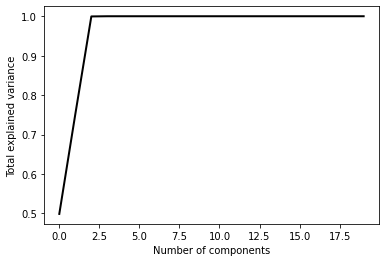

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(cumulative_sum , color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.show()

In [29]:
# Apply PCA
pca = PCA(n_components=3)
pca.fit(scaled_numeric_df)
df_transformed = pca.transform(scaled_numeric_df)

In [30]:
df_transformed.shape

(209593, 3)

### Training Data

In [31]:
X1=df_transformed
y1=df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(146715, 3)
(62878, 3)
(146715,)
(62878,)


### Accuracy

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

print('Training score =', model1.score(X_train, y_train))
print('Test score =', model1.score(X_test, y_test))

Training score = 0.874743550420884
Test score = 0.8761888100766564


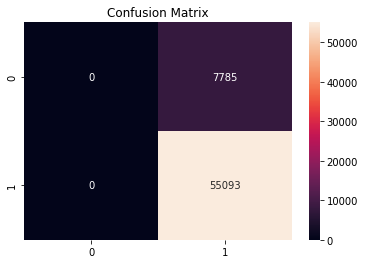

In [33]:
from sklearn.metrics import confusion_matrix
ypred = model1.predict(X_test)
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [34]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8761888100766564
Precision = 0.8761888100766564
Recall = 1.0
F1 Score = 0.9340092056522366


ROC AUC = 0.8197284614824416


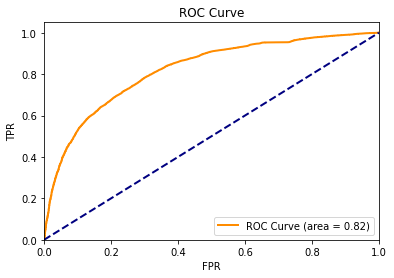

In [35]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = model1.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest Classifier

In [36]:
RFCtest = RandomForestClassifier().fit(X_train,y_train)
rfc_predictions = RFCtest.predict(X_test)
acc_rfc = RFCtest.score(X_test, y_test)
print('The Random Forest Algorithm has an accuracy of', acc_rfc)
f1 = f1_score(y_test, rfc_predictions, average='weighted')  # Use 'binary' for binary classification
print("F1 Score:", f1)


The Random Forest Algorithm has an accuracy of 0.8929514297528547
F1 Score: 0.8793978841520969


### K Nearest Neighbors Model

In [37]:
KNCtest = KNeighborsClassifier().fit(X_train,y_train)
knc_predictions = KNCtest.predict(X_test)
acc_knc = KNCtest.score(X_test, y_test)
print('The K Neighbors Algorithm has an accuracy of', acc_knc)
f1 = f1_score(y_test, knc_predictions, average='weighted')  # Use 'binary' for binary classification
print("F1 Score:", f1)

The K Neighbors Algorithm has an accuracy of 0.8891981297115048
F1 Score: 0.8782450438326291


### Decision Tree Classifier

In [38]:
DTCtest = DecisionTreeClassifier().fit(X_train,y_train)
dtc_predictions = DTCtest.predict(X_test)
acc_dtc = DTCtest.score(X_test, y_test)
print('The Decision Tree Algorithm has an accuracy of', acc_dtc)
f1 = f1_score(y_test, dtc_predictions, average='weighted')  # Use 'binary' for binary classification
print("F1 Score:", f1)

The Decision Tree Algorithm has an accuracy of 0.8456216800788829
F1 Score: 0.8476280178724472


In [39]:
NB_Model = MultinomialNB()
RFC_Model = RandomForestClassifier()
SVC_Model = SVC()
KNC_Model = KNeighborsClassifier()
DTC_Model = DecisionTreeClassifier()

In [40]:
vector = CountVectorizer()


In [41]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(5,30),'weights':['uniform','distance']}
GS=RandomizedSearchCV(knn,param,cv=3,scoring='f1_weighted',n_jobs=-1)
GS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'weights': ['uniform', 'distance']},
                   scoring='f1_weighted')

In [42]:
GS.best_params_

{'weights': 'distance', 'n_neighbors': 29}

In [43]:
dt=DecisionTreeClassifier(random_state=0)

In [44]:
param={'max_depth':np.arange(3,50),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
GS=RandomizedSearchCV(dt,param,cv=3,scoring='f1_weighted')
GS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                   scoring='f1_weighted')

In [45]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=5,weights='distance')
DT=DecisionTreeClassifier(criterion='gini',max_depth=14,min_samples_leaf=19,random_state=0)
RF=RandomForestClassifier(criterion='entropy',n_estimators=7,random_state=0)

In [46]:
RF_var=[]
for val in np.arange(1,50):
  RF=RandomForestClassifier(criterion='gini',n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(RF, X_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  RF_var.append(np.var(cv_results,ddof=1))

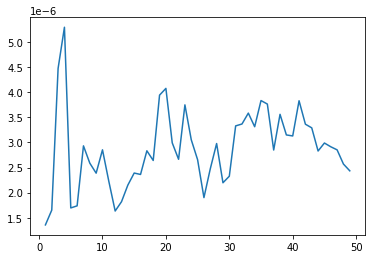

In [47]:
x_axis=np.arange(1,50)
plt.plot(x_axis,RF_var)

In [48]:
param={'max_depth':np.arange(3,50),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
GS=RandomizedSearchCV(dt,param,cv=3,scoring='f1_weighted')
GS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                   scoring='f1_weighted')

In [49]:
GS.best_params_

{'min_samples_leaf': 19, 'max_depth': 39, 'criterion': 'entropy'}

### Ada Boost Classifier

In [50]:
Ada_bias=[]
for val in np.arange(1,20):
  Ada=AdaBoostClassifier(n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(Ada, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  Ada_bias.append(1-np.mean(cv_results))
  #print(val,1-np.mean(cv_results))

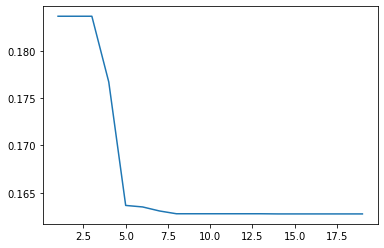

In [51]:
x_axis=np.arange(1,20)
plt.plot(x_axis,Ada_bias)

In [52]:
np.argmin(Ada_bias)

13

### Gradient Boosting Classifier

In [53]:
GB_bias=[]
for val in np.arange(1,20):
  gb=GradientBoostingClassifier(n_estimators=val)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(gb, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  GB_bias.append(1-np.mean(cv_results))
  #print(val,1-np.mean(cv_results))

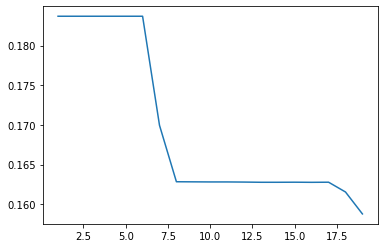

In [54]:
x_axis=np.arange(1,20)
plt.plot(x_axis,GB_bias)

### Comparing Models

In [55]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=5,weights='distance')
DT=DecisionTreeClassifier(criterion='gini',max_depth=14,min_samples_leaf=19,random_state=0)
RF=RandomForestClassifier(criterion='entropy',n_estimators=7,random_state=0)
Bag=BaggingClassifier(n_estimators=3,random_state=0)
AB=AdaBoostClassifier(n_estimators=16,random_state=0)
GB=GradientBoostingClassifier(n_estimators=17)


models = []
models.append(('Logistic', LR))

models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))

models.append(('AdaBoost',AB))
models.append(('GBoost',GB))

### Results

Logistic: 0.816300 (0.000007)
KNN: 0.874537 (0.000009)
DecisionTree: 0.867824 (0.000001)
RandomForest: 0.871457 (0.000003)
AdaBoost: 0.837251 (0.000003)
GBoost: 0.837215 (0.000003)


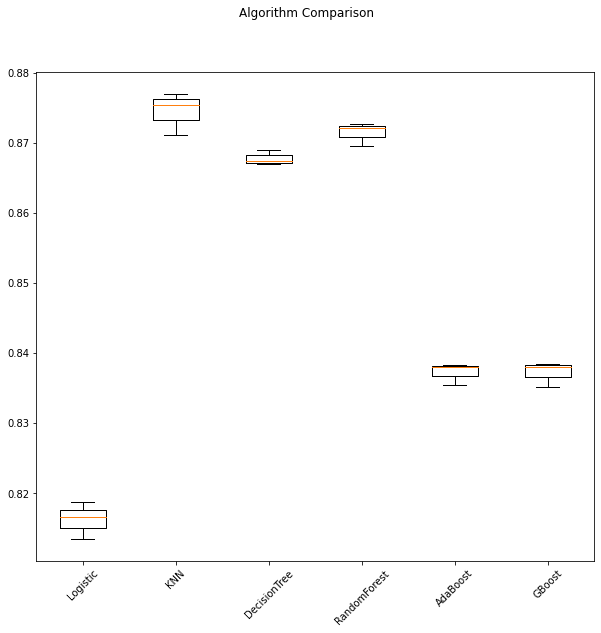

In [56]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure(figsize=(10,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=45)
plt.show()

Based on the aforementioned outcomes, it is evident that the K Nearest Neighbor model outperforms the others. Through a comprehensive comparison of bias error and variance error across all algorithms, it is concluded that KNN is the most effective, and therefore, it will be employed for predicting loan defaulters.

In [57]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [58]:
predictions = KNN.predict(X_test)

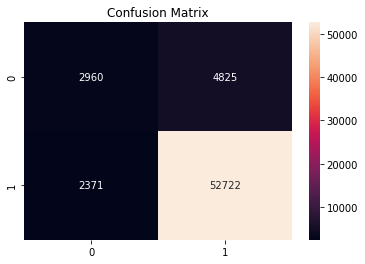

In [59]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [60]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8855561563662966
Precision = 0.9161554902948894
Recall = 0.956963679596319
F1 Score = 0.9361150568181819


ROC AUC = 0.7664085825986002


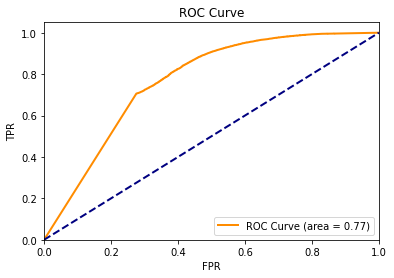

In [61]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = KNN.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Testing & Final Predictions

In [62]:
# Set a random seed for reproducibility (optional)
np.random.seed(42)

# Randomly choose 100 indices
random_indices = list(np.random.choice(len(df_transformed), size=100, replace=False))

# Select corresponding elements from df and y
df_test_final = df_transformed[random_indices]
y_test_final = y1[random_indices]

In [63]:
y_test_final

89746     1
179839    1
152209    1
88486     1
43138     1
         ..
32702     1
70473     1
153122    1
172219    1
198413    1
Name: label, Length: 100, dtype: int64

In [64]:
df_test_final.shape, y_test_final.shape

((100, 3), (100,))

In [65]:
ab = AB.fit(X_train, y_train)
gb = GB.fit(X_train, y_train)

In [66]:
model_list = [['LR', model1], ['RF', RFCtest], ['KNN', KNCtest], ['DTC', DTCtest], ['AB', ab], ['GB', gb]]
for name, model in model_list:
#     model
    test_predictions = model.predict(df_test_final)
    print('For model '+name)
    print('\n')
    print(classification_report(y_test_final, test_predictions))

For model LR


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.90      1.00      0.95        90

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100

For model RF


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.99      0.99      0.99        90

    accuracy                           0.98       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.98      0.98      0.98       100

For model KNN


              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.95      1.00      0.97        90

    accuracy                           0.95       100
   macro avg       0.97      0.75      0.82       100
weighted avg       0.95     